The second model we would be looking at is the ARIMA model. Firstly, we would plot the ACF graph to determine the relevant p and q values. Next, we would find the suitable p and q values through testing each p and q combinations through a code. Lastly, we would use AUTOARIMA function to determine the p and q values. With 3 sets of p and q values, we would want to determine which model is the most accurate.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [5]:
#to load the model and than append the interest rates column into the dataframe.
df=pd.read_csv(r"C:\Users\htaoh\Downloads\NVDA.csv", usecols = [0,1,2,3,4])
df["Date"] = pd.to_datetime(df["Date"],dayfirst = True)
interest_rate = pd.read_csv(r"C:\Users\htaoh\Downloads\FEDFUNDS.csv")
interest_rate["DATE"] = pd.to_datetime(interest_rate["DATE"],dayfirst = True)
df['Year-Month']=df['Date'].dt.to_period('M')
interest_rate['Year-Month']=interest_rate['DATE'].dt.to_period('M')
df_new = df.merge(interest_rate, on=['Year-Month'])
df_final = df_new.drop(['Year-Month', 'DATE','FEDFUNDS (scaled by 100)'], axis=1)
df_final

,Date,Open,High,Low,Close,FEDFUNDS
0,2019-01-02,32.660000,34.619999,32.512501,34.055000,2.40
1,2019-01-03,33.447498,33.790001,31.922501,31.997499,2.40
2,2019-01-04,32.735001,34.432499,32.424999,34.047501,2.40
3,2019-01-07,34.625000,36.222500,34.107498,35.849998,2.40
4,2019-01-08,36.672501,36.695000,34.224998,34.957500,2.40
...,...,...,...,...,...,...
1190,2023-09-25,415.910004,425.359985,411.769989,422.220001,5.33
1191,2023-09-26,420.010010,428.200012,416.549988,419.109985,5.33
1192,2023-09-27,423.299988,428.720001,416.290009,424.679993,5.33
1193,2023-09-28,424.600006,434.459991,421.149994,430.890015,5.33


In [7]:
#select values from 2021 onwards since its closer to the prediction data and could potentially give better predictions
df_from_2021 = df_final.iloc[505:]
df_from_2021.index= df_from_2021["Date"]
df_from_2021

,Date,Open,High,Low,Close,FEDFUNDS
Date,,,,,,
2021-01-04,2021-01-04,131.042496,136.524994,129.625000,131.134995,0.09
2021-01-05,2021-01-05,130.997498,134.434998,130.869995,134.047501,0.09
2021-01-06,2021-01-06,132.225006,132.449997,125.860001,126.144997,0.09
2021-01-07,2021-01-07,129.675003,133.777496,128.865005,133.440002,0.09
2021-01-08,2021-01-08,133.625000,134.210007,130.419998,132.767502,0.09
...,...,...,...,...,...,...
2023-09-25,2023-09-25,415.910004,425.359985,411.769989,422.220001,5.33
2023-09-26,2023-09-26,420.010010,428.200012,416.549988,419.109985,5.33
2023-09-27,2023-09-27,423.299988,428.720001,416.290009,424.679993,5.33


In [12]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df_from_2021['Close'])

1. ADF :  -0.32583800103138105
2. P-Value :  0.9217643429540759
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 687
5. Critical Values :
	 1% :  -3.439904442607456
	 5% :  -2.8657562268758907
	 10% :  -2.569015252972123


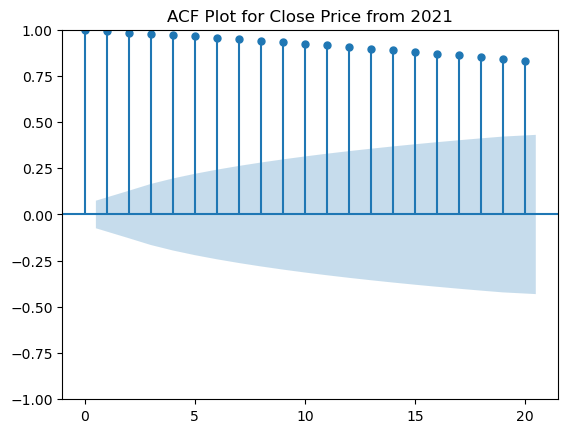

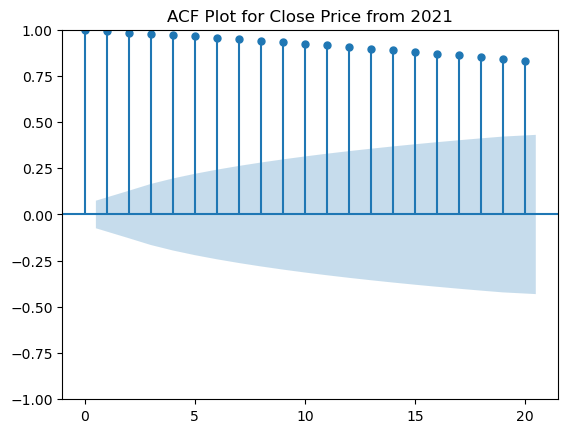

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_from_2021["Close"], 
         lags=20, 
         title="ACF Plot for Close Price from 2021")

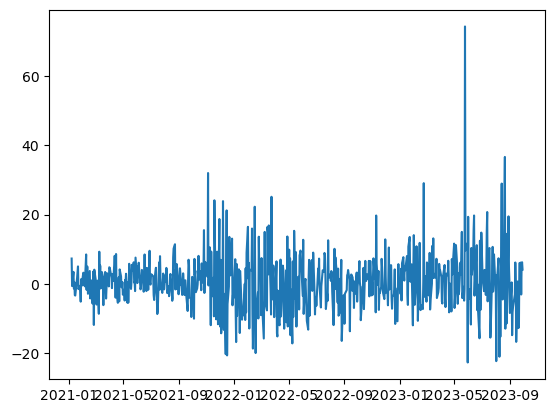

In [13]:
#One step differencing and the values and plotting the grpah after one step differencing
df_from_2021["Close after first differencing"] = df_from_2021["Close"].diff()
df_from_2021.dropna(inplace = True)
plt.plot(df_from_2021["Close after first differencing"])

In [14]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df_from_2021["Close after first differencing"])

1. ADF :  -26.36679061362789
2. P-Value :  0.0
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 686
5. Critical Values :
	 1% :  -3.439918423003054
	 5% :  -2.865762386436236
	 10% :  -2.5690185346241785


# Choosing the P and Q values

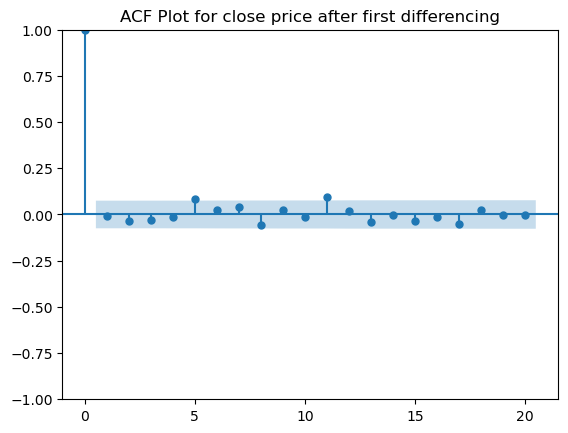

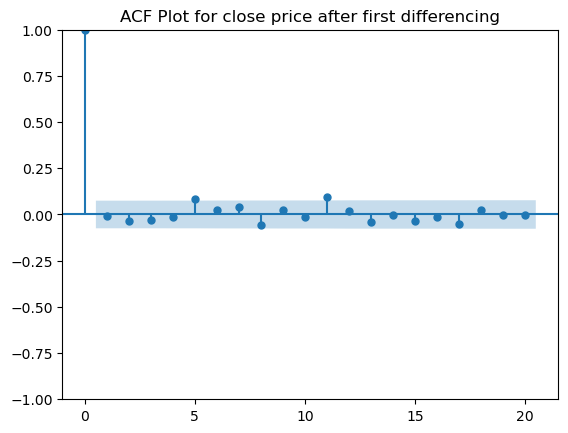

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_from_2021["Close after first differencing"], 
         lags=20, 
         title="ACF Plot for close price after first differencing")

From the ACF plot, a suitable value of p is 5 (as it is the smallest value that goes beyound the blue range.) A suitable q value is 8 (as it has the largest difference in lag from the next lag value at which the autocorrelation is computed.) 

In [16]:
#Split train and test data.

num = int(0.8*len(df_from_2021))

train = df_from_2021.iloc[:num]
test = df_from_2021.iloc[num:]

A more accurate method of determining the P and Q values is through comparing the AIC value.The code below runs through every p and q combination possible to find the combination with the smallest AIC value. The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. The most accurate model is one with the smallest AIC value.

In [17]:
from statsmodels.tsa.arima.model import ARIMA
def arima_model_test(data):
    list1 = []
    for p in range(5):
        for q in range(5):
            list1.append((p,0,q))
            
    model = []
    for i in list1:
        m=ARIMA(train["Close after first differencing"],order=i).fit()
        model.append(m)
        
    aic=[]
    bic=[]
    for j in model[0:]:
        aic.append(j.aic)
        bic.append(j.bic)
                
    forecast = []
    for v in model:
        f=v.predict(0,len(test)-1)
        forecast.append(f)
   
    v1 = pd.DataFrame({'model':model,'p,d,q':list1,'AIC':aic,'BIC':bic})
    
        
    return(v1)

In [18]:
dff = arima_model_test(train)
dff.head()

C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\a

,model,"p,d,q",AIC,BIC
0,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,"(0, 0, 0)",3708.385510,3717.001706
1,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,"(0, 0, 1)",3710.053916,3722.978211
2,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,"(0, 0, 2)",3709.543937,3726.776331
3,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,"(0, 0, 3)",3711.113890,3732.654382
4,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,"(0, 0, 4)",3713.113879,3738.962470


In [19]:
dff[dff.AIC == dff['AIC'].min()]

,model,"p,d,q",AIC,BIC
18,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,"(3, 0, 3)",3707.966212,3742.431


# Model Building - AutoARIMA

In [21]:
from pmdarima import auto_arima
model_parameters = auto_arima(train["Close after first differencing"],trace = True,supress_warnings = True)
model_parameters.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3711.767, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3708.386, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3710.099, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3710.054, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3706.864, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3711.405, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.228 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:                        SARIMAX   Log Likelihood               -1852.432
Date:                Tue, 24 Oct 2023   AIC                           3706.864
Time:                        22:24:26   BIC                           3711.172
Sample:                             0   HQIC                          3708.548
                                - 549                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        49.9244      2.162     23.093      0.000      45.687      54.161
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                92.02
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               2.38   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train["Close after first differencing"], order=(0,0,0))
model = model.fit()
model.summary()

C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:     Close after first differencing   No. Observations:                  549
Model:                                      ARIMA   Log Likelihood               -1852.193
Date:                            Tue, 24 Oct 2023   AIC                           3708.386
Time:                                    22:24:30   BIC                           3717.002
Sample:                                         0   HQIC                          3711.753
                                            - 549                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2085      0.308      0.677      0.498      -0.395       0.812
sigma2        49.8807      2.218     22.488      0.000      45.533      54.228
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                92.02
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
start=len(train)
end=len(train)+len(test)-1
pred1=model.predict(start=start,end=end,typ='levels')
pred1.index= df_from_2021.index[start:end + 1]
print(pred1)

Date
2023-03-15    0.208529
2023-03-16    0.208529
2023-03-17    0.208529
2023-03-20    0.208529
2023-03-21    0.208529
                ...   
2023-09-25    0.208529
2023-09-26    0.208529
2023-09-27    0.208529
2023-09-28    0.208529
2023-09-29    0.208529
Name: predicted_mean, Length: 138, dtype: float64


C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

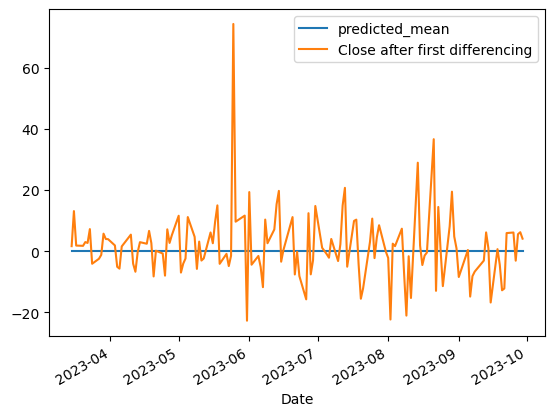

In [24]:
pred1.plot(legend=True)
test["Close after first differencing"].plot(legend=True)

# Model Building - Human Picked Values

In [27]:
#ARIMA model with (p,d,q) values (3,0,3), the model with the lowest AIC value
model = sm.tsa.arima.ARIMA(train["Close after first differencing"], order=(3,0,3))
model = model.fit()
model.summary()

C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:     Close after first differencing   No. Observations:                  549
Model:                             ARIMA(3, 0, 3)   Log Likelihood               -1845.983
Date:                            Tue, 24 Oct 2023   AIC                           3707.966
Time:                                    22:30:15   BIC                           3742.431
Sample:                                         0   HQIC                          3721.436
                                            - 549                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1877      0.310      0.606      0.544      -0.419       0.794
ar.L1          0.8050      0.119      6.762      0.000       0.572       1.038
ar.L2          0.6012      0.200      3.011      0.003       0.210       0.993
ar.L3         -0.8455      0.114     -7.392      0.000      -1.070      -0.621
ma.L1         -0.8305      0.101     -8.240      0.000      -1.028      -0.633
ma.L2         -0.6423      0.174     -3.686      0.000      -0.984      -0.301
ma.L3          0.9124      0.099      9.235      0.000       0.719       1.106
sigma2        48.6667      2.268     21.455      0.000      44.221      53.113
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                80.08
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
start=len(train)
end=len(train)+len(test)-1
pred1=model.predict(start=start,end=end,typ='levels')
pred1.index= df_from_2021.index[start:end + 1]
print(pred1)

Date
2023-03-15   -0.330536
2023-03-16   -1.285164
2023-03-17   -1.096153
2023-03-20   -1.293171
2023-03-21   -0.531004
                ...   
2023-09-25    0.187597
2023-09-26    0.197577
2023-09-27    0.204652
2023-09-28    0.207372
2023-09-29    0.205379
Name: predicted_mean, Length: 138, dtype: float64


C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

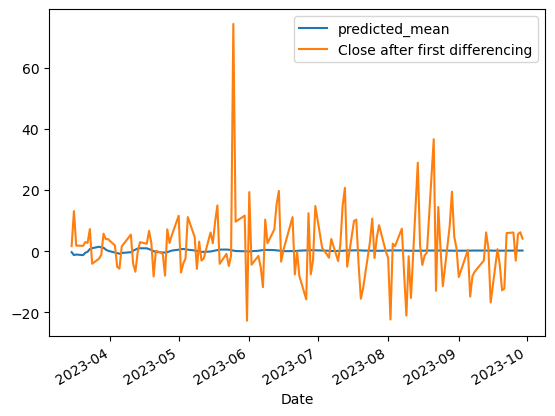

In [29]:
pred1.plot(legend=True)
test["Close after first differencing"].plot(legend=True)

In [30]:
#ARIMA model with (p,d,q) values (5,0,8), the model dereived from the ACF Plot
model = sm.tsa.arima.ARIMA(train["Close after first differencing"], order=(5,0,8))
model = model.fit()
model.summary()

C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:     Close after first differencing   No. Observations:                  549
Model:                             ARIMA(5, 0, 8)   Log Likelihood               -1837.769
Date:                            Tue, 24 Oct 2023   AIC                           3705.539
Time:                                    22:30:39   BIC                           3770.160
Sample:                                         0   HQIC                          3730.794
                                            - 549                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2132      0.353      0.605      0.545      -0.478       0.904
ar.L1         -0.0731      0.211     -0.346      0.729      -0.487       0.341
ar.L2          0.3486      0.224      1.554      0.120      -0.091       0.788
ar.L3         -0.2682      0.146     -1.843      0.065      -0.553       0.017
ar.L4         -0.0149      0.173     -0.086      0.931      -0.354       0.324
ar.L5          0.8320      0.172      4.849      0.000       0.496       1.168
ma.L1          0.0763      0.218      0.350      0.726      -0.351       0.503
ma.L2         -0.4442      0.221     -2.008      0.045      -0.878      -0.011
ma.L3          0.2968      0.135      2.203      0.028       0.033       0.561
ma.L4          0.0719      0.175      0.411      0.681      -0.271       0.415
ma.L5         -0.8750      0.184     -4.765      0.000      -1.235      -0.515
ma.L6          0.0827      0.045      1.825      0.068      -0.006       0.172
ma.L7          0.1025      0.050      2.038      0.042       0.004       0.201
ma.L8         -0.1145      0.061     -1.889      0.059      -0.233       0.004
sigma2        47.2967      2.363     20.014      0.000      42.665      51.928
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                86.79
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.27   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
start=len(train)
end=len(train)+len(test)-1
pred1=model.predict(start=start,end=end,typ='levels')
pred1.index= df_from_2021.index[start:end + 1]
print(pred1)

Date
2023-03-15   -0.905406
2023-03-16   -1.037726
2023-03-17    2.791863
2023-03-20    0.211639
2023-03-21   -0.505713
                ...   
2023-09-25    0.222969
2023-09-26    0.196873
2023-09-27    0.235696
2023-09-28    0.191357
2023-09-29    0.229945
Name: predicted_mean, Length: 138, dtype: float64


C:\Users\htaoh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

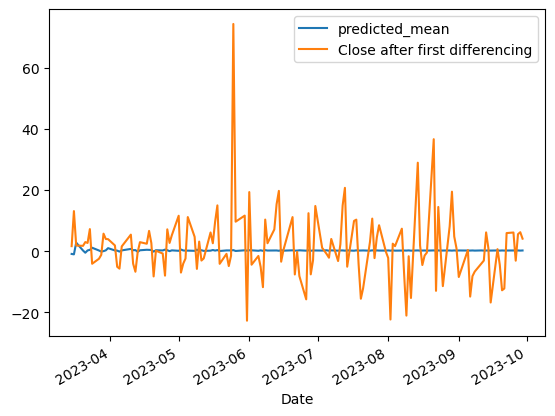

In [32]:
pred1.plot(legend=True)
test["Close after first differencing"].plot(legend=True)

From the above 3 graphs, the model with (p,d,q) values of (3,0,3) has the most accurate predictions from Apr 2023 to June 2023. All 3 ARIMA model fail to prcisely predict the values from June 2023 onwards

Unfortunately, the ARIMA model is inaccurate in determining the change in stock prices within the dataset compared to the LSTM model. This maybe because the ARIMA model only looks into the closing price whilst the LSTM model also looks into the Open, High,Low prices , interest rate and SMA.  Hence, the final predicted prices would use the LSTM model instead. 

# Conclusion

 We have come to the end of the stock price prediction model. Even though machine learning models are capable of predicting future prices, it also disregards the current non-techinical factors that could impact future stock prices such as current events. For instance, NVDA is at the heart of US-China chip war and was recently annouced that the US would curbs export of more AI chips, including Nvidia H800, to China. This event would most likely cause the stock prices to plummet more than what is predicted from the model due to negative comsumer sentiment.